<a href="https://colab.research.google.com/github/XaviSaenz/PracticasAI/blob/main/XavierG_Examen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Examen del modulo Inteligencia Artificial**

# 1. Regresión

### ¿Qué es un problema de regresión?

5 pts

Es un modelo que predice algunos datos dado unos features (entrada x) y un target (entrada y). Este modelo al igual tiene algoritmos de prueba y metricas de evaluacion

### Da dos ejemplos de un problema de regresión

20 pts

Tomando en cuenta la base de datos que utilizaste para tu proyecto, y otra mas que se utilizo en clase (la que mas te haya gustado o llamado la atencion), ejemplifica dos problemas de regresion, argumentando cual es su resultado, si es bueno o malo, y utilizando las metricas de evaluacion correctas.

In [2]:
#EJEMPLO 1 REGRESION LINEAL DATASET USADO EN CLASE


import numpy as np
import pandas as pd
# define the data/predictors as the pre-set feature names
data = pd.read_csv('/content/drive/MyDrive/Maestria/Cursos Extras/Inteligencia Artificial/Datasets/insurance.csv')
data
#sobrescribimos los valores string a valores numericos
data['sex'] = data['sex'].map({'female': 1 , 'male' : 0})
data.head()
#sobrescribimos los valores string a valores numericos
data['smoker'] = data['smoker'].map({'yes': 1 , 'no' : 0})
data.head()
#Creamos valores dummmies
#se quita la columna region
#Se crean nuevas columnas pero ahora agregando un 1 si pertenece a la region como se ve en el resultado

ohe = pd.get_dummies(data.region, prefix = 'region')
ohe
#Eliminanos la columna region porque ya la descompusimos en otras 4
data = data.drop('region', axis = 1)
data.head()
#Sobrescribimos la tabla para agregar los valores dummies
data = data.join(ohe)
data.head()
import statsmodels.api as sm

X = data[['age', 'sex', 'bmi', 'children', 'smoker']]
y = data['charges']

#Implementamos el modelo y predicciones
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                charges   R-squared (uncentered):                   0.873
Model:                            OLS   Adj. R-squared (uncentered):              0.872
Method:                 Least Squares   F-statistic:                              1828.
Date:                Sat, 05 Aug 2023   Prob (F-statistic):                        0.00
Time:                        19:09:46   Log-Likelihood:                         -13627.
No. Observations:                1338   AIC:                                  2.726e+04
Df Residuals:                    1333   BIC:                                  2.729e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

La anterior practica la utilize como ejemplo de regresion lineal porque se ejemplifica muy bien como los valores de R^2 son cercanos a 1, por lo que el resultado es bueno

In [3]:
#EJEMPLO 1 REGRESION LINEAL CON DATASET DE MI PROYECTO



import pandas as pd
import numpy as np
import statsmodels.api as sm


df = pd.read_csv('/content/drive/MyDrive/Maestria/Cursos Extras/Inteligencia Artificial/Datasets/Posibles DataSets para el proyecto/backloggd_games.csv')

#Revisamos datos nulos por columna
valores_nulos = df.isnull().sum()
valores_nulos[:5]
#print(df.dtypes)

#Para verificar cuantas filas y columnas tiene nuestra base de datos.
#print(df.shape)

#Revisamos primero cuantos valores nulos en total tenemos
total_celdas = np.product(df.shape)
total_nulos = valores_nulos.sum()

#eliminamos los valores nulos
renglones_Nan = df.dropna()

#Revisamos cuantos renglones teniamos originalmente y cuantas eliminamos.
#print("Numero de renglones en el dataset original: \n",  df.shape)
#print("Numero de renglones eliminadas: ",  renglones_Nan.shape)

nuevo_dataset_sin_NAN = renglones_Nan

        #'Title', , 'Reviews' , 'Lists' 'Plays', 'Playing',
dataset_sin_NAN = nuevo_dataset_sin_NAN[['Backlogs', 'Wishlist', 'Rating']]
#print ("\n"*3, dataset_sin_NAN.head())

#Creamos 2 nuevas columnas
dataset_sin_NAN['High_Rating'] = 0
dataset_sin_NAN['Low_Rating'] = 0

#Declaramos nuevas etiquetas para el rating

ctr = 0
high = 0
low = 0
for i in dataset_sin_NAN["Rating"]:
  if(dataset_sin_NAN["Rating"].values[ctr] > 2.3):
    dataset_sin_NAN["High_Rating"].values[ctr] = 1
    dataset_sin_NAN["Low_Rating"].values[ctr] = 0
    high += 1

  else:
    dataset_sin_NAN["High_Rating"].values[ctr] = 0
    dataset_sin_NAN["Low_Rating"].values[ctr] = 1
    low +=1
  ctr +=1

print(high)
print(low)

#dataset_sin_NAN = dataset_sin_NAN.drop('Rating', axis = 'columns')
#print(dataset_sin_NAN.head())
#print(dataset_sin_NAN.dtypes)

#Algoritmo de regresion lineal 1: dado que el target se dividio en 2
X = dataset_sin_NAN[['Backlogs', 'Wishlist']]
y_high_rating = dataset_sin_NAN['High_Rating']
y_low_rating = dataset_sin_NAN['Low_Rating']
y = dataset_sin_NAN['Rating']

#Implementamos el modelo y predicciones
model_high_rating = sm.OLS(y, X).fit()
#model_low_rating = sm.OLS(y_low_rating, X).fit()

predictions_high = model_high_rating.predict(X)
#predictions_low = model_low_rating.predict(X)

print(model_high_rating.summary())
#print("\n"*5, model_low_rating.summary())




<ipython-input-3-417474f010c5>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_sin_NAN['High_Rating'] = 0
<ipython-input-3-417474f010c5>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_sin_NAN['Low_Rating'] = 0


20536
4265
                                 OLS Regression Results                                
Dep. Variable:                 Rating   R-squared (uncentered):                   0.204
Model:                            OLS   Adj. R-squared (uncentered):              0.204
Method:                 Least Squares   F-statistic:                              3180.
Date:                Sat, 05 Aug 2023   Prob (F-statistic):                        0.00
Time:                        19:19:01   Log-Likelihood:                         -60585.
No. Observations:               24801   AIC:                                  1.212e+05
Df Residuals:                   24799   BIC:                                  1.212e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

A pesar que el valor de R^2 es muy cercano a 0, al momento de compararlo con la tarea 3, se puede apreciar que este algoritmo se comporto mejor. Sin embargo dado que el valor es 0.204 se concluye que el resultado no es bueno

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2. Clasificación

### ¿Qué es un problema de clasificación?

5 pts

Es un modelo que se utiliza para clasificar caracteristicas de un conjunto de datos teniendo en cuenta valores de entrada (feature(s) y target) y de igual manera se necesita entrenar al modelo.

### Da dos ejemplos de un problema de clasificación

20 pts

Tomando en cuenta la base de datos que utilizaste para tu proyecto, y otra mas que se utilizo en clase (la que mas te haya gustado o llamado la atencion), ejemplifica dos problemas de regresion, argumentando cual es su resultado, si es bueno o malo, y utilizando las metricas de evaluacion correctas.

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
Accuracy: 0.8246753246753247
F1 Score: 0.8280932435425034


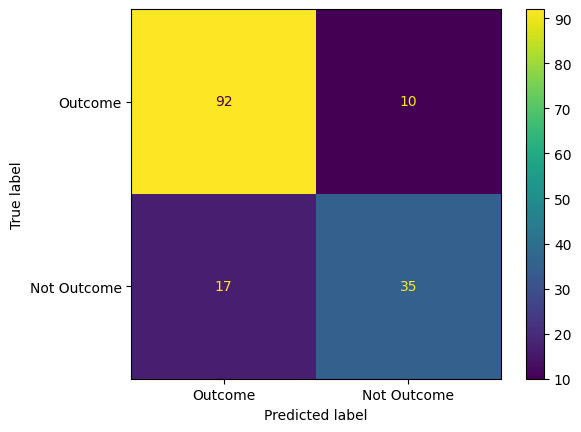

In [5]:
#Naive bayes
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
                              accuracy_score,
                              confusion_matrix,
                              ConfusionMatrixDisplay,
                              f1_score,
                              classification_report,
                            )

data_set = pd.read_csv('/content/drive/MyDrive/Maestria/Cursos Extras/Inteligencia Artificial/Datasets/diabetes.csv')
print(data_set.columns)

#split dataset in features and target variable
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = data_set[feature_cols] # Features
y = data_set.Outcome # Target variable

#print (y)

#Aqui se empieza con NaiveBayes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)
naive_bayes = GaussianNB()

#Entrenando el modelo
naive_bayes.fit(X_train, y_train)

#Prediccion
prediccion = naive_bayes.predict(X_test)

#print("Actual Value:", y_test)
#print("Predicted Value:", prediccion)

accuray = accuracy_score(prediccion, y_test)
f1 = f1_score(prediccion, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

labels = ["Outcome", "Not Outcome"]
cm = confusion_matrix(y_test, prediccion)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();


En el ejemplo anterior se puede apreciar el comportamiento del clasificador Naive Bayes, y se aprecia como se clasificaron los datos en Outcome y Not Outcome (tanto los valores reales como los valores sacados como predicciones)

     Plays  Playing  Backlogs  Wishlist  Lists  Reviews
0  21000.0      4.1       5.6       5.5    4.6   3000.0
1  35000.0      3.1       5.6    3000.0    5.1   3000.0
2  25000.0      3.5       7.3    4000.0    3.2      2.1
3  25000.0      2.7       9.6       2.6    3.4      2.1
4  32000.0    728.0       5.7       2.1    3.9      2.5
(60000, 14)
840000
39549
   Unnamed: 0                                    Title Release_Date  \
0           0                               Elden Ring    25-Feb-22   
1           1  The Legend of Zelda: Breath of the Wild     3-Mar-17   
2           2                                    Hades     7-Dec-18   
3           3                            Hollow Knight    24-Feb-17   
4           4                                Undertale    15-Sep-15   

                                          Developers  \
0     ['FromSoftware', 'Bandai Namco Entertainment']   
1  ['Nintendo', 'Nintendo EPD Production Group No...   
2                               ['Supergiant

ValueError: ignored

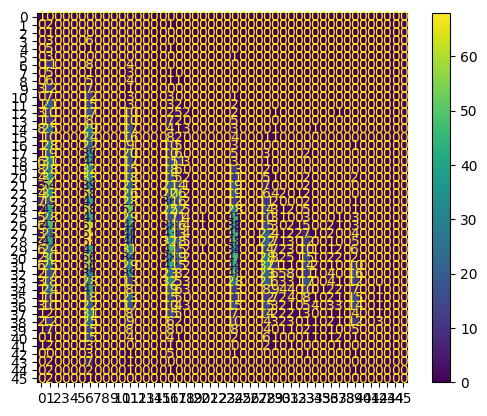

In [6]:
from sklearn.naive_bayes import GaussianNB
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import (precision_score, recall_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score, classification_report)
from sklearn import preprocessing

df = pd.read_csv('/content/drive/MyDrive/Maestria/Cursos Extras/Inteligencia Artificial/Datasets/Posibles DataSets para el proyecto/backloggd_games.csv')
df.columns
        #'Title'
X = df[['Plays', 'Playing', 'Backlogs', 'Wishlist', 'Lists', 'Reviews']]
print (X.head())
y = df['Rating']
y.head()

#Revisamos datos nulos por columna
valores_nulos = df.isnull().sum()
valores_nulos[:5]

#Para verificar cuantas filas y columnas tiene nuestra base de datos.
print(df.shape)

#Revisamos primero cuantos valores nulos en total tenemos
total_celdas = np.product(df.shape)
total_nulos = valores_nulos.sum()

print(total_celdas)
print(total_nulos)

#eliminamos los valores nulos
renglones_Nan = df.dropna()
print(renglones_Nan.head())

#Revisamos cuantos renglones teniamos originalmente y cuantas eliminamos.
print("Numero de renglones en el dataset original: \n",  df.shape)
print("Numero de renglones eliminadas: ",  renglones_Nan.shape)

nuevo_dataset_sin_NAN = renglones_Nan

        #'Title', , 'Reviews' , 'Lists' 'Plays', 'Playing',
X = nuevo_dataset_sin_NAN[[ 'Backlogs', 'Wishlist']]

print (X.head())

#y = nuevo_dataset_sin_NAN['Rating']
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(nuevo_dataset_sin_NAN['Rating'])
print(y_transformed)

X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.2, random_state=16)

# test_size=0.2 significa que el 20% de los datos se utilizará para prueba, y el 80% para entrenamiento
# random_state se utiliza para garantizar la reproducibilidad de los resultados

# Mostrar las dimensiones de los conjuntos de datos resultantes
print("Dimensiones de X_train:", X_train.shape) #(616, 8) el 8 son los numeros de etiquetas, en este caso son los numeros de columnas que se pusieron arriba
print("Dimensiones de X_test:", X_test.shape)
print("Dimensiones de y_train:", y_train.shape) #este es el numero de etiquetas
print("Dimensiones de y_test:", y_test.shape)


naive_bayes = GaussianNB()

#Entrenamos
naive_bayes.fit(X_train, y_train)

#Predecimos
prediccion = naive_bayes.predict(X_test)

accuray = accuracy_score(prediccion, y_test)
f1 = f1_score(prediccion, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

labels = ["Outcome", "Not Outcome"]
cm = confusion_matrix(y_test, prediccion)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

Utilizando el modelo NaiveBayes para una dataset que yo escogi, se puede apreciar como el modelo no es muy amigable cuando el target tiene multiples valores o etiquetas. Al igual que el accuracy salio muy cercano a 0, por lo tanto se concluye que este modelo no es bueno para este tipo de dataset (considerando unicamente los valores de entrada que se usaron)

# 3. Agrupamiento

### ¿Qué es un problema de agrupamiento?

5 pts

Es un modelo para poder clasificar varios elementos en clusters y determinar que tan lejos o cercanos estan con respecto a un target o data_set

### Da al menos un ejemplo de un problema de agrupamiento

15 pts

Respuesta: Explica primero con palabras un ejemplo en el cual utilizar un modelo de agrupamiento pueda ayudarte a resolver un problema. Despues, utilizando cualquiera de las bases de datos que utilizamos en clase, ejemplifica el uso de un modelo de agrupamiento.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Centroids (in PCA-reduced space):
        PC1       PC2
0  1.488447 -0.173149
1 -0.631102  0.073415


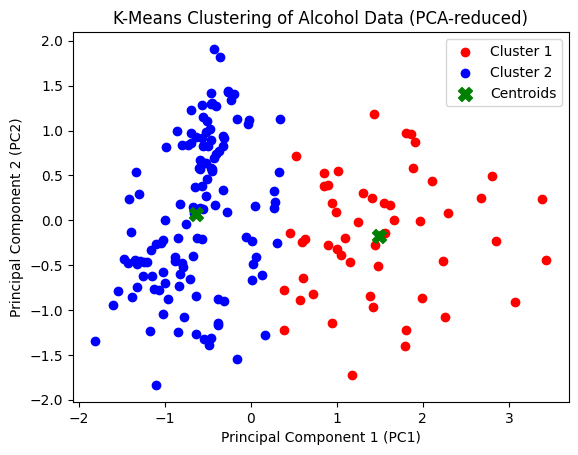

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

alcohol_data = pd.read_csv('/content/drive/MyDrive/Maestria/Cursos Extras/Inteligencia Artificial/Datasets/wine-clustering.csv')
# Pasamos los datos a variables de caracteristicas y objetivo
alcohol_features = alcohol_data[['Alcohol', 'Malic_Acid']]

target = alcohol_data['Color_Intensity']
# Normalizamos los datos de caracteristicas
centroide = StandardScaler()
centroid_features = centroide.fit_transform(alcohol_features)
# Aplicamos PCA a los datos
pca = PCA(n_components=2)
reduced_alcohol_features = pca.fit_transform(alcohol_features)
# Aplicamos k medias
K = 2
kmeans = KMeans(n_clusters=K, random_state=42)
kmeans.fit(reduced_alcohol_features)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_
alcohol_data['Cluster'] = labels

print("Cluster Centroids (in PCA-reduced space):")
print(pd.DataFrame(centroids, columns=['PC1', 'PC2']))

plt.scatter(reduced_alcohol_features[alcohol_data['Cluster'] == 0, 0], reduced_alcohol_features[alcohol_data['Cluster'] == 0, 1], color='red', label='Cluster 1')
plt.scatter(reduced_alcohol_features[alcohol_data['Cluster'] == 1, 0], reduced_alcohol_features[alcohol_data['Cluster'] == 1, 1], color='blue', label='Cluster 2')
plt.scatter(centroids[:, 0], centroids[:, 1], color='green', marker='X', s=100, label='Centroids')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend()
plt.title('K-Means Clustering of Alcohol Data (PCA-reduced)')
plt.show()

En el problema anterior se puede apreciar como la informacion (de diferentes labels) se agrupan con respecto a 2 centroides. Se puede apreciar como el conjunto se agrupo en 2 y como algunos valores estan mas cercanos y otros mas lejanos

### ¿Como funciona el algoritmo de k-medias?

10 pts

El Modelo K-medias funciona para clasificar un conjunto de datos respecto a unos centroides. Un uso para este algoritmo podria ser para ver como un cierto conjunto de features (como en el codigo de arriba relacionado a caracteristicas de vino) se agrupan respecto a la intensidad en color (centroide) por lo que se podria apreciar que tanto estas caracteristicas estan relacionadas (que tan lejanas o cercanas estan)

# 4. Reducción de dimensiones

### ¿Cuál es el objetivo de la reducción de dimensiones?

10 pts

Sirve para reducir las dimensiones en un conjunto de datos (por ejemplo reducir de unos datos en 4 dimensiones a 2 dimensiones) y se utliza para tener una mejor visualizacion de los datos al tener grupos en dimensiones mas reducidas

### ¿Como funciona el algoritmo de PCA?

10 pts

Es una tecnica no supervisada para la reduccion de dimensionalidades, que ayuda a tener una mejor interpretacion de los datos



#Extra puntos:

- Menciona con tus propias palabras, cual es la diferencia entre el aprendizaje supervisado y no supervisado. (2 pts)

- Menciona en que casos es apropiado utilizar ambos modelos (Puedes ejemplificar con un problema visto en clase) (2 pts)
